In [5]:
import nelpy as nel
import pandas as pd
import numpy as np
# sys.path.append(r'C:/Users/schafferlab/Documents/GitHub/neurocode/loadData')
sys.path.append(r'C:\Users\schafferlab\Documents\ripple_heterogeneity\python')
import loading
import matplotlib.pyplot as plt

In [132]:
import matplotlib

def plot_sig_replay_over_epochs(basepath,ax):

    states_dict = loading.load_SleepState_states(basepath)
    epoch_df = loading.load_epoch(basepath)
    ripples = loading.load_ripples_events(basepath)

    cmap = matplotlib.cm.get_cmap('tab20')

    var_keys = ['WAKEstate','NREMstate','REMstate']

    y = np.arange(len(var_keys + list(epoch_df.environment))+2)*.1

    for i,key in enumerate(var_keys):
        for pair in states_dict[key]:
            plt.axvspan(pair[0], pair[1],y[i],y[i+1], alpha=0.5,color=cmap(i*.1))

    for ep in epoch_df.itertuples():
        i+=1
        plt.axvspan(ep.startTime, ep.stopTime,y[i],y[i+1], alpha=0.5,color=cmap(i*.1))
    
    i+=1

    for ep in ripples.itertuples():
        plt.axvspan(ep.start, ep.stop,y[i],y[i+1], alpha=0.15,color='k')
 
    ax = plt.gca()
    ax.set_yticks(y[:-1]+.05)
    ax.set_yticklabels(var_keys + list(epoch_df.environment) + ["ripples"])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xlabel('Recording time (s)')
# plot_sig_replay_over_epochs(basepath,)

In [123]:
ripples

,start,stop,peaks,amplitude,duration,frequency,detectorName,ripple_channel,event_spk_thres,basepath,basename,animal
0,20.0992,20.1608,20.1304,50.276332,0.0616,172.854465,bz_DetectSWR,38,0,D:/app_ps1/data/hpc04/hpc04_day06_220217_085558,hpc04_day06_220217_085558,hpc04
1,23.8392,23.8920,23.8816,28.444102,0.0528,125.338536,bz_DetectSWR,38,0,D:/app_ps1/data/hpc04/hpc04_day06_220217_085558,hpc04_day06_220217_085558,hpc04
2,24.6632,24.7176,24.7080,147.671520,0.0544,141.042140,bz_DetectSWR,38,0,D:/app_ps1/data/hpc04/hpc04_day06_220217_085558,hpc04_day06_220217_085558,hpc04
3,30.6592,30.7008,30.6976,11.996372,0.0416,71.007747,bz_DetectSWR,38,0,D:/app_ps1/data/hpc04/hpc04_day06_220217_085558,hpc04_day06_220217_085558,hpc04
4,42.9464,42.9808,42.9792,15.502777,0.0344,113.739370,bz_DetectSWR,38,0,D:/app_ps1/data/hpc04/hpc04_day06_220217_085558,hpc04_day06_220217_085558,hpc04
...,...,...,...,...,...,...,...,...,...,...,...,...
5689,18761.9464,18762.0216,18761.9984,59.898988,0.0752,126.337904,bz_DetectSWR,38,0,D:/app_ps1/data/hpc04/hpc04_day06_220217_085558,hpc04_day06_220217_085558,hpc04
5690,18762.4352,18762.4880,18762.4640,293.648944,0.0528,147.328815,bz_DetectSWR,38,0,D:/app_ps1/data/hpc04/hpc04_day06_220217_085558,hpc04_day06_220217_085558,hpc04
5691,18762.9824,18763.0232,18763.0168,71.702758,0.0408,135.904322,bz_DetectSWR,38,0,D:/app_ps1/data/hpc04/hpc04_day06_220217_085558,hpc04_day06_220217_085558,hpc04
5692,18763.8416,18763.8912,18763.8672,14.904994,0.0496,68.370655,bz_DetectSWR,38,0,D:/app_ps1/data/hpc04/hpc04_day06_220217_085558,hpc04_day06_220217_085558,hpc04


In [68]:
basepath = 'D:/app_ps1/data/hpc04/hpc04_day06_220217_085558'
# basepath = 'D:/app_ps1/data/hpc01/day26_211202_100114'
# basepath = r'D:\app_ps1\data\hpc04\hpc04_day09_220221_094101'
# basepath = r'D:\app_ps1\data\hpc01\day27_211203_095713'

ripples = loading.load_ripples_events(basepath)

# behavioral epochs
epoch_df = loading.load_epoch(basepath)
behavioral_epochs = nel.EpochArray([np.array([epoch_df.startTime,
                                                epoch_df.stopTime]).T])
# get brain states                                                
state_dict = loading.load_SleepState_states(basepath)
nrem_epochs = nel.EpochArray(state_dict['NREMstate'])
wake_epochs = nel.EpochArray(state_dict['WAKEstate'])

ripple_epochs = nel.EpochArray([np.array([ripples.start, ripples.stop]).T])




In [76]:
ripple_epochs[behavioral_epochs[1]]

<EpochArray at 0x20fa7bf5100: 538 epochs> of length 27.5032 seconds

In [77]:
nrem_epochs

<EpochArray at 0x20fa850bca0: 70 epochs> of length 1:53:16 hours

In [11]:
wake_epochs

<EpochArray at 0x20fa3dcdd00: 61 epochs> of length 2:38:51 hours

In [78]:
print(behavioral_epochs)
epoch_df

<EpochArray at 0x20fa8312610: 7 epochs> of length 5:12:56 hours


,name,startTime,stopTime,environment,behavioralParadigm
0,acquisition,0.0000,18776.0000,unknown,NaN
1,pre_task_sleep,0.0000,2252.9000,sleep,NaN
2,post_injection_habituation,3112.0945,5140.9954,sleep,encoding
3,baseline,5263.4628,7749.0926,open_field,object_location
4,post_task_sleep,7881.6755,13151.7238,sleep,object_location
5,test,13263.5259,14671.5331,open_field,object_location
6,post_task_sleep,14673.9464,18765.7567,sleep,object_location


In [69]:
x = ripple_epochs.starts
bins = np.arange(x.min(),x.max(),300)
ts = (bins[:-1]+300/2)
binned,_ = np.histogram(x,bins=bins)

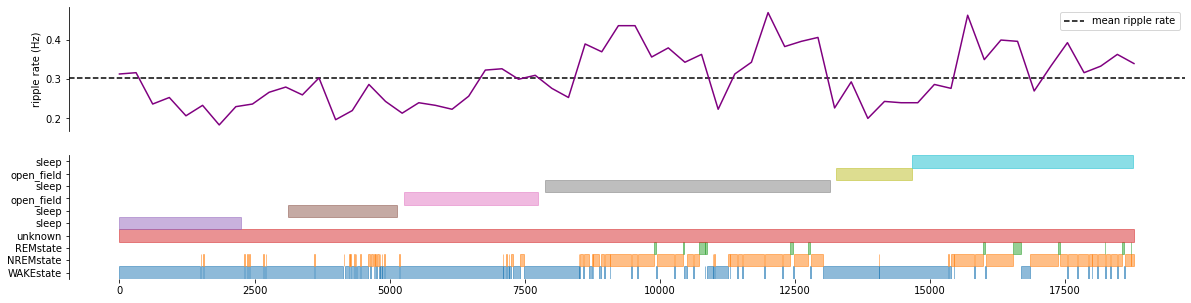

In [104]:
fig, ax = plt.subplots(2,1, figsize=(20,5))
ax[0].plot(ts,binned/300,color = "purple")
ax[0].axhline(np.mean(binned/300),linestyle = '--',color='k',zorder = -100,label = "mean ripple rate")
# ax[0].axvspan(behavioral_epochs[0].start,behavioral_epochs[0].stop,alpha=.2,zorder=-1000)
# ax[0].axvspan(behavioral_epochs[1].start,behavioral_epochs[1].stop,alpha=.2,zorder=-1000,color='r',label="object learning")
# ax[0].axvspan(behavioral_epochs[2].start,behavioral_epochs[2].stop,alpha=.2,zorder=-1000,color='purple',label="sleep")
ax[0].legend()
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].get_xaxis().set_ticks([])

ax[0].set_ylabel('ripple rate (Hz)')
# ax[0].xlabel('time (sec)')
plot_sig_replay_over_epochs(basepath,ax[1])


In [15]:
x = ripple_epochs.starts
bins = np.arange(x.min(),x.max(),300)
ts = (bins[:-1]+300/2)
binned,_ = np.histogram(x,bins=bins)

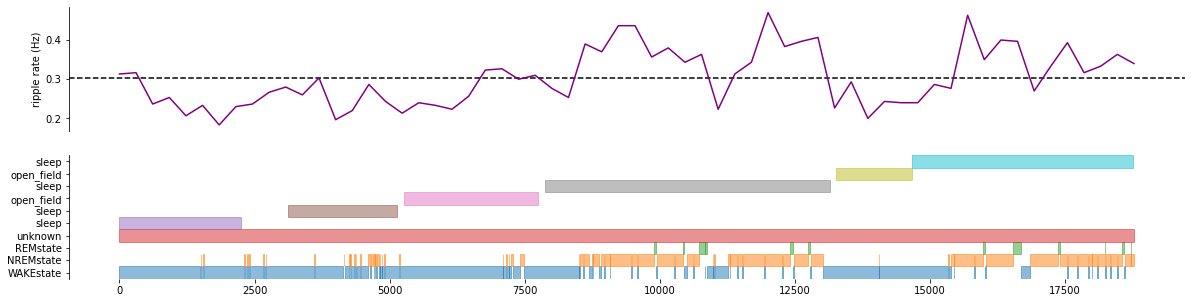

In [100]:
fig, ax = plt.subplots(2,1,figsize=(20,5))

ax[0].plot(ts,binned/300,color = 'purple')
ax[0].axhline(np.mean(binned/300),linestyle = '--',color='k',zorder = -100,label = "mean ripple rate")
# ax[0].axvspan(behavioral_epochs[1].start,behavioral_epochs[1].stop,alpha=.2,zorder=-1000)
# ax[0].axvspan(behavioral_epochs[3].start,behavioral_epochs[3].stop,alpha=.2,zorder=-1000,color='r',label="object learning")
# ax[0].axvspan(behavioral_epochs[5].start,behavioral_epochs[5].stop,alpha=.2,zorder=-1000,color='purple',label="object test")
# ax[0].axvspan(behavioral_epochs[4].start,behavioral_epochs[4].stop,alpha=.2,zorder=-1000)
# ax[0].axvspan(behavioral_epochs[6].start,behavioral_epochs[6].stop,alpha=.2,zorder=-1000,label="sleep")
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].set_ylabel('ripple rate (Hz)')
ax[0].get_xaxis().set_ticks([])


plot_sig_replay_over_epochs(basepath,ax[1])


In [57]:
## PTSH ripple across epochs
import functions
C = functions.crossCorr(ripple_epochs.starts,ripple_epochs.starts,0.1,100)


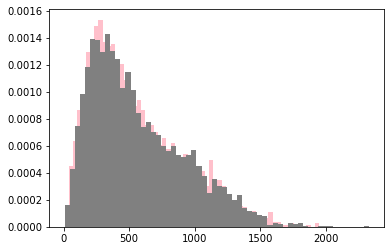

In [59]:
idx_1 = ripples.peaks.between(behavioral_epochs[0].start,behavioral_epochs[0].stop)
# idx_2 = ripples.peaks.between(behavioral_epochs[1].start,behavioral_epochs[1].stop)
idx_3 = ripples.peaks.between(behavioral_epochs[2].start,behavioral_epochs[2].stop)

import seaborn as sns

plt.hist(ripples[idx_1].amplitude,60,density = True,color='pink')
# plt.hist(ripples[idx_2].amplitude,60,density = True,color='grey')
plt.hist(ripples[idx_3].amplitude,60,density = True,color='grey')

plt.show()

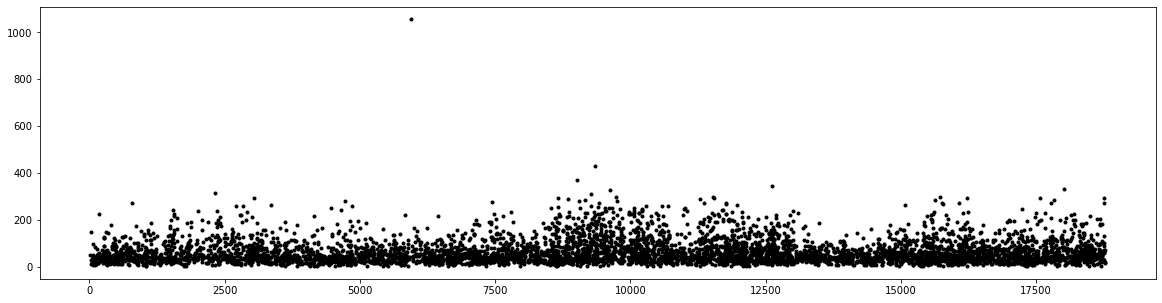

In [107]:
plt.figure(figsize=(20,5))
plt.plot(ripples.start,ripples.amplitude,'.k')

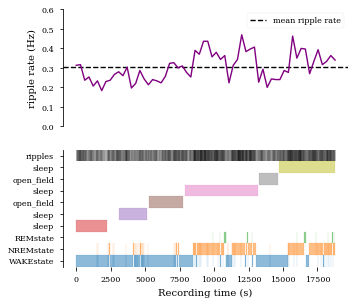

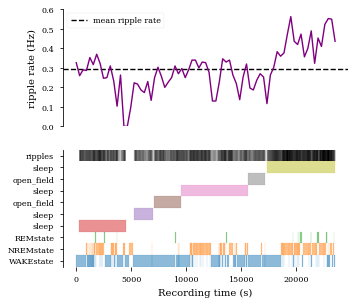

In [147]:
import os
sessions = ['D:/app_ps1/data/hpc04/hpc04_day06_220217_085558',
'D:/app_ps1/data/hpc04/hpc04_day09_220221_094101',]
save_path = r'D:\app_ps1\figures'
days = ['Iso-Ctrl','Ly6G']

functions.set_plotting_defaults()
for i,basepath in enumerate(sessions): 
    
    ripples = loading.load_ripples_events(basepath)

    # behavioral epochs
    epoch_df = loading.load_epoch(basepath)
    behavioral_epochs = nel.EpochArray([np.array([epoch_df.startTime,
                                                epoch_df.stopTime]).T])
    # get brain states                                                
    state_dict = loading.load_SleepState_states(basepath)
    nrem_epochs = nel.EpochArray(state_dict['NREMstate'])
    wake_epochs = nel.EpochArray(state_dict['WAKEstate'])

    ripple_epochs = nel.EpochArray([np.array([ripples.start, ripples.stop]).T])
    
    x = ripple_epochs.starts
    bins = np.arange(x.min(),x.max(),300)
    ts = (bins[:-1]+300/2)
    binned,_ = np.histogram(x,bins=bins)

    fig, ax = plt.subplots(2,1,figsize=functions.set_size('beamer',fraction = 1.2, subplots = (1.5,1)))

    ax[0].plot(ts,binned/300,color = 'purple')
    ax[0].axhline(np.mean(binned/300),linestyle = '--',color='k',zorder = -100,label = "mean ripple rate")
    # ax[0].axvspan(behavioral_epochs[1].start,behavioral_epochs[1].stop,alpha=.2,zorder=-1000)
    # ax[0].axvspan(behavioral_epochs[3].start,behavioral_epochs[3].stop,alpha=.2,zorder=-1000,color='r',label="object learning")
    # ax[0].axvspan(behavioral_epochs[5].start,behavioral_epochs[5].stop,alpha=.2,zorder=-1000,color='purple',label="object test")
    # ax[0].axvspan(behavioral_epochs[4].start,behavioral_epochs[4].stop,alpha=.2,zorder=-1000)
    # ax[0].axvspan(behavioral_epochs[6].start,behavioral_epochs[6].stop,alpha=.2,zorder=-1000,label="sleep")
    ax[0].legend()
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['bottom'].set_visible(False)
    ax[0].set_ylabel('ripple rate (Hz)')
    ax[0].set_ylim([0,.6])
    ax[0].get_xaxis().set_ticks([])


    plot_sig_replay_over_epochs(basepath,ax[1])


    plt.savefig(os.path.join(save_path,days[i]+'.svg'),dpi=300,bbox_inches='tight')


In [136]:
os.path.join(save_path+days[i]+'.svg')

'D:/app_ps1/data/hpc04/hpc04_day09_220221_094101Ly6G.svg'

In [115]:
print(behavioral_epochs[0])


<EpochArray at 0x20fa92ec9a0: 1 epoch> of length 6:30:51:956 hours
